__Exercise 1__ : 

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age.

But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. So let's look at the distribution of age.

The BRFSS dataset includes a column, AGE, which represents each respondent's age in years. To protect respondents' privacy, ages are rounded off into 5-year bins. AGE contains the midpoint of the bins.

Extract the variable 'AGE' from the DataFrame brfss and assign it to age.

Plot the PMF of age as a bar chart, using Pmf from empiricaldist.

In [1]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

In [2]:
from empiricaldist import Pmf

In [3]:
# your solution here
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/' +
         'ElementsOfDataScience/raw/master/brfss.hdf5')

In [4]:
import pandas as pd

brfss = pd.read_hdf('brfss.hdf5', 'brfss')
age = brfss['AGE']

# Clean data
age = age.dropna()

# Convert age series to list
age_list = list(age)

# bin:
# start: 20, end: 90
# bin1: 20 < X <= 25, bin2: 25 < X <= 30, ..., bin14: 85 < X <= 90
round_age = []
for i in range(len(age_list)):
    for j in range(4, 18):
        if ((age_list[i] > j * 5) and (age_list[i] <= (j+1) * 5)):
            round_age.append(((j * 5) + ((j + 1) * 5)) / 2)

Text(0.5, 1.0, 'Distribution of Age')

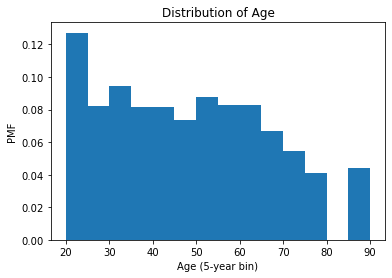

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Pmf.from_seq(round_age).bar(width=5)

plt.xlabel("Age (5-year bin)")
plt.ylabel("PMF")
plt.title("Distribution of Age")

__Exercise II__:
Now let's look at the distribution of weight. The column that contains weight in kilograms is WTKG3. Because this column contains many unique values, displaying it as a PMF doesn't work very well.

In [6]:
weight = brfss['WTKG3']
weight = weight.dropna()

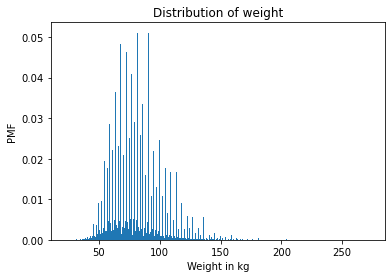

In [7]:
Pmf.from_seq(weight).bar()

plt.xlabel('Weight in kg')
plt.ylabel('PMF')
plt.title('Distribution of weight');

To get a better view of this distribution, try plotting the CDF.

Compute the CDF of a normal distribution with the same mean and standard deviation, and compare it with the distribution of weight. Is the normal distribution a good model for this data? What about log-transformed weights?

In [8]:
mean, std = weight.mean(), weight.std()
print(mean, std)

81.20201715130878 20.945679292027915


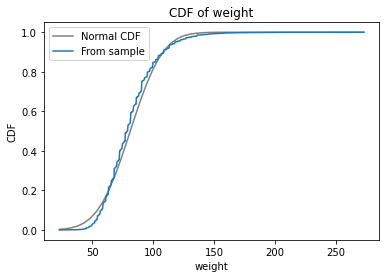

In [9]:
# your solution here.
from empiricaldist import Cdf
from scipy.stats import norm
import numpy as np

# Normal CDF
xs = np.linspace(min(weight), max(weight))
ys1 = norm(mean, std).cdf(xs)
plt.plot(xs, ys1, color='gray', label='Normal CDF')

cdf_weight = Cdf.from_seq(weight)
cdf_weight.plot(label='From sample')
plt.xlabel('weight')
plt.ylabel('CDF')
plt.title('CDF of weight')
plt.legend()

Normal distribution seems to be a good estimate of the sample as its line's trend is close to the CDF from sample with some deviations.

Text(0.5, 1.0, 'CDF of log transformed weight')

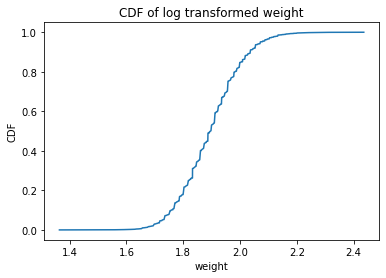

In [10]:
weight_log = np.log10(weight)

Cdf.from_seq(weight_log).plot()
plt.xlabel('weight')
plt.ylabel('CDF')
plt.title('CDF of log transformed weight')

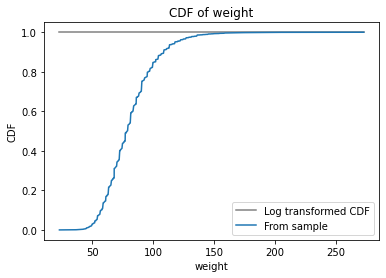

In [11]:
# Normal CDF
mean2, std2 = weight_log.mean(), weight_log.std()

xs = np.linspace(min(weight), max(weight))
ys2 = norm(mean2, std2).cdf(xs)
plt.plot(xs, ys2, color='gray', label='Log transformed CDF')

cdf_weight = Cdf.from_seq(weight)
cdf_weight.plot(label='From sample')
plt.xlabel('weight')
plt.ylabel('CDF')
plt.title('CDF of weight')
plt.legend()

This result is difficult to compare with actual data as they are in different scale.

In [12]:
sample_ls = list(weight)
log_ls = list(weight_log)

compare = {'Sample': sample_ls, 'Log-transformed': log_ls}
df = pd.DataFrame(compare)

In [13]:
df.corr()

,Sample,Log-transformed
Sample,1.000000,0.982173
Log-transformed,0.982173,1.000000


From df.corr(), we can see that the correlation of sample and log-transformed data is 0.98 (which indicates a strong relation)

__Exercise III__:

Now let's make a scatter plot of weight versus age. Adjust alpha and markersize to avoid overplotting. Use ylim to limit the y axis from 0 to 190 kilograms.

Text(0.5, 1.0, 'Weight versus age')

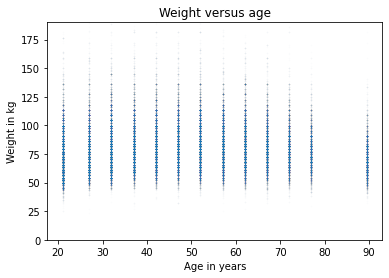

In [18]:
# Solution goes here
weight = brfss['WTKG3']
age = brfss['AGE']

plt.plot(age, weight, 'o', alpha=0.01, markersize=0.5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.ylim([0, 190])
plt.title('Weight versus age')

__Exercise IV__: 
    In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly.

Add random noise to age with mean 0 and standard deviation 2.0.
Make a scatter plot and adjust alpha and markersize again.

Text(0.5, 1.0, 'Weight versus age')

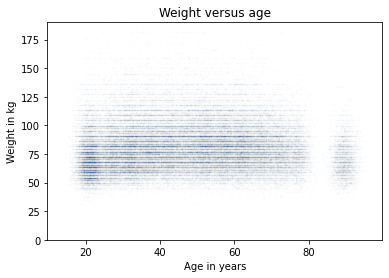

In [19]:
# Your solution here
weight = brfss['WTKG3']
age = brfss['AGE']

noise = np.random.normal(0, 2.0, size=len(brfss))
age_jitter = age + noise

plt.plot(age_jitter, weight, 'o', alpha=0.01, markersize=0.5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.ylim([0, 190])
plt.title('Weight versus age')

__Exercise V__:

The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The column _VEGESU1 represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

From the brfss DataFrame, select the columns 'AGE', INCOME2, and _VEGESU1.
Compute the correlation matrix for these variables.

In [21]:
# Solution goes here
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]
subset.corr()

,AGE,INCOME2,_VEGESU1
AGE,1.000000,-0.015158,-0.009834
INCOME2,-0.015158,1.000000,0.119670
_VEGESU1,-0.009834,0.119670,1.000000


__Exercise VI__:

In the previous exercise, the correlation between income and vegetable consumption is about 0.12. The correlation between age and vegetable consumption is about -0.01.

Which of the following are correct interpretations of these results?

A: People in this dataset with higher incomes eat more vegetables.
B: The relationship between income and vegetable consumption is linear.
C: Older people eat more vegetables.
D: There could be a strong non-linear relationship between age and vegetable consumption.

# Solution goes here
A: since the correlation of income and vegetable consumption is positive, it indicates a positive relationship between income and vegetable consumption, which means 'A' is not wrong although the correlation is quite weak.

D

__Exercise VII__ :

In general it is a good idea to visualize the relationship between variables before you compute a correlation. We didn't do that in the previous example, but it's not too late.

Generate a visualization of the relationship between age and vegetables. How would you describe the relationship, if any?

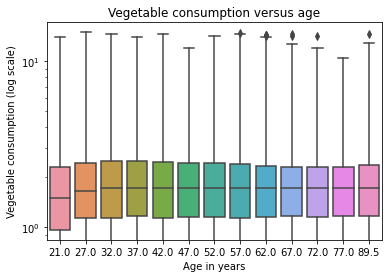

In [22]:
# Solution goes here
import seaborn as sns

data = brfss.dropna(subset=['AGE', '_VEGESU1'])
sns.boxplot(x='AGE', y='_VEGESU1', data=data, whis=10)

plt.yscale('log') 
plt.xlabel('Age in years')
plt.ylabel('Vegetable consumption (log scale)')
plt.title('Vegetable consumption versus age');

There is a positive relationship between age and vegatable consumption from age group 21 to 32. However, from 32 age group, the median vegatable consumption stay relatively stable. But, there are some variations in the maximum and minimum vegetable consumption.